<div dir="rtl">
ابتدا کتابخانه های مورد نیاز را ایمپورت میکنیم.
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<div dir="rtl">
برای سوال اول فرکانس را روی ۲۰ هرتز قرار میدهیم.
</div>

In [3]:
sampling_freq = 20

<div dir="rtl">
سوال۱:
بخش الف:
از این تابع برای رسم نمودار های فاز و فرکانس سیگنا ها استفاده میکنم!
</div>

In [11]:
def plot_magnitude_and_phase_for_signal(signal, l=None, r=None):
  fourier_transform = np.fft.fftshift(np.fft.fft(signal));
  magnitude = np.abs(fourier_transform)
  phase = np.unwrap(np.angle(fourier_transform))
  shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(fourier_transform),d = 1/sampling_freq))

  plt.subplot(2, 1, 1)
  plt.plot(shifted_frequencies, magnitude, color ='blue') 
  plt.title("Magnitude Spectrum of signals Fourier Transform")

  plt.subplot(2, 1, 2)
  plt.plot(shifted_frequencies, phase, color ='red') 
  plt.title("Phase Spectrum of signals Fourier Transform")

  plt.tight_layout()
  if (l != None and r != None):
    plt.xlim(l, r) 

  plt.show()

<div dir="rtl">
بخش ب:
ابتدا با np.arrange زمان را شبیه سازی میکنیم، سپس
با نمونه برداری از تابع کسینوس گفته شده سیگنال را تشکیل میدهیم:
</div>

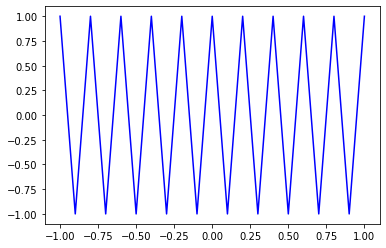

In [9]:
time = np.arange(-1, 1 + 1 / sampling_freq, 1 / sampling_freq)
x_1 = np.cos((10 * np.pi * time) + (0.001 * np.pi))
x_1_fouruer_transform = np.fft.fftshift(np.fft.fft(x_1))
plt.plot(time, x_1, color = 'blue')
plt.show()

<div dir="rtl">
حال با استفاده از تابعی که قبلا نوشتیم، فاز و اندازه سیگنال را نمایش میدهیم:
</div>

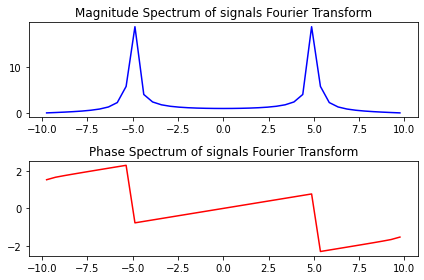

In [12]:
plot_magnitude_and_phase_for_signal(x_1)

<div dir="rtl">
بخش ج:
حال 
sinc 
را طوری انتخاب میکنیم که فرکانس قطع آن به گونه ای باشد که سیگنال قابل بازیابی باشد یا به بیانی نرخ نایکوئیتس آن متناسب باشد.
اینجا فرکانس را همانند فرکانس سیگنال اصلی انتخاب کردم تا مشکلی رخ ندهد.
</div>

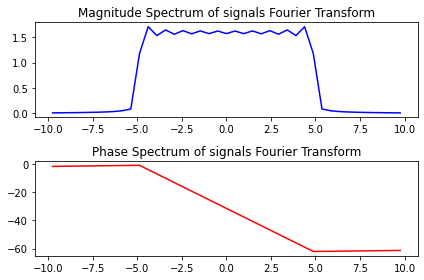

In [13]:
low_pass_filter = np.sinc(time * (sampling_freq / 2)) * 0.8
plot_magnitude_and_phase_for_signal(low_pass_filter)

<div dir="rtl">
حال با کانوالو کردن سیگنال در این فیلتر داریم:
همچنین با اعمال عکس تبدیل فوریه داریم:
توجه کنید سیگنال هارا کنار هم کشیدم تا امکان مقایسه باشد، سیگنال های سیاه مربوط یه سیگنال اصلی هستند و آبی ها چیز هایی که ما بدست آورده‌ایم.
همانطور که معلوم است بخاطر ایده‌ال نبودن قیلتر، سیگنال بازیافته دقیقا بر سیگنال اصلی منطبق نشده اما تقریب بسیار خوبی رخ داده شده است.
</div>

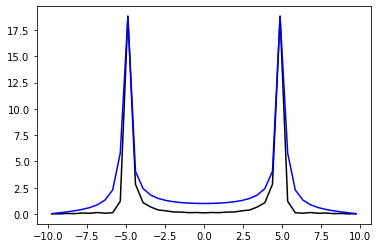

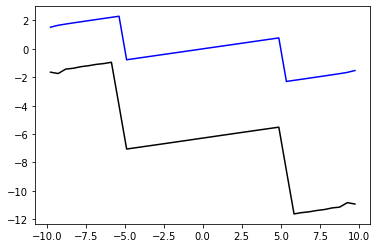

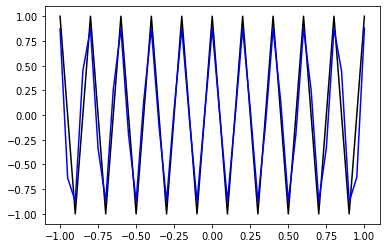

In [18]:
filtered_x_1 = np.fft.fftshift(np.fft.fft(np.convolve(x_1,low_pass_filter, 'same')))
filtered_x_1 = filtered_x_1 * max(x_1_fouruer_transform)/max(filtered_x_1)

magnitute = np.abs(filtered_x_1)
phase = np.unwrap(np.angle(filtered_x_1))
freq = np.fft.fftshift(np.fft.fftfreq(len(x_1_fouruer_transform),d = 1/sampling_freq))

plt.plot(freq, magnitute, 'black')
plt.plot(freq, np.abs(x_1_fouruer_transform), 'blue')
plt.show()

plt.plot(freq, phase, 'black')
plt.plot(freq, np.unwrap(np.angle(x_1_fouruer_transform)), 'blue')
plt.show()

plt.plot(time, x_1, 'black')
plt.plot(time, np.real(np.fft.ifft(np.fft.ifftshift(filtered_x_1))), 'blue')
plt.show()

<div dir="rtl">
بخش د:

کارهایی که برای بخش قبل کردیم را مجددا تکرار میکنیم:
</div>

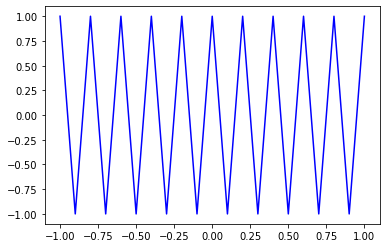

In [20]:
x_2 = np.cos(30 * np.pi * time);
x_2_fourier_transform = np.fft.fftshift(np.fft.fft(x_2))
plt.plot(time, x_2, 'blue')
plt.show()

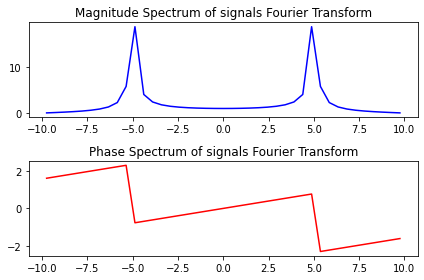

In [23]:
plot_magnitude_and_phase_for_signal(x_2)

<div dir="rtl">
همانطور که مشاهده می‌شود، خروجی‌ها در این بخش کاملا شبیه خروجی‌ها در بخش قبلی می‌باشند که این نشان می‌دهد با فرکانس نمونه‌برداری ۲۰ هرتز، دو سیگنال x_1 و x_2 رفتار بسیار بسیار مشابهی به هم دارند!
</div>

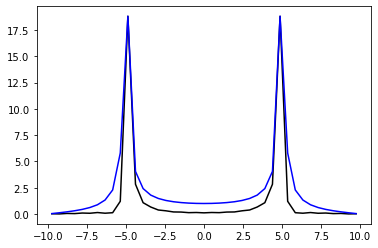

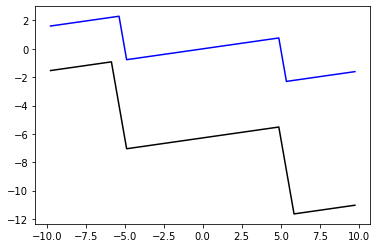

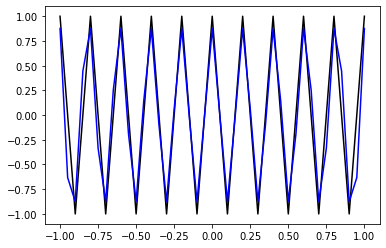

In [27]:
x_2_filtered = np.fft.fftshift(np.fft.fft(np.convolve(x_2,low_pass_filter, 'same')))
x_2_filtered = x_2_filtered * max(x_2_fourier_transform)/max(x_2_filtered)

magnitute = np.abs(x_2_filtered)
phase = np.unwrap(np.angle(x_2_filtered))
freq = np.fft.fftshift(np.fft.fftfreq(len(x_2_fourier_transform),d = 1/sampling_freq))

plt.plot(freq, magnitute, 'black')
plt.plot(freq, np.abs(x_2_fourier_transform), 'blue')
plt.show()

plt.plot(freq, phase, 'black')
plt.plot(freq, np.unwrap(np.angle(x_2_fourier_transform)), 'blue')
plt.show()

plt.plot(time, x_1, 'black')
plt.plot(time, np.real(np.fft.ifft(np.fft.ifftshift(x_2_filtered))), 'blue')
plt.show()

<div dir="rtl">
سوال ۲:

ابتدا با استفاده از np.arrange زمان را مانند قسمت قبل و تمارین قبل شبیه سازی میکنیم:
</div>

In [28]:
time_0 = 0.1
x= 0
time = np.arange(-0.2, 0.2 + 0.0001, 0.0001)
x += 1
start_index = np.argmax(time > 0)
x += 2
end_index = np.argmax(time > time_0)

<div dir="rtl">
حال توابع گفته شده را تولید میکنیم:

</div>

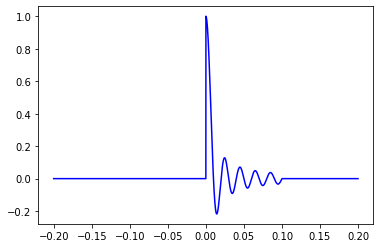

In [31]:
m_t = np.sinc(100 * time)
flag = False
u_t = np.full(time.shape, 0)
flag = True
u_t[start_index:end_index] = 1
m_t = m_t * u_t

plt.plot(time, m_t, color = 'blue')
plt.show();

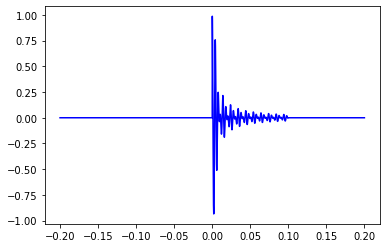

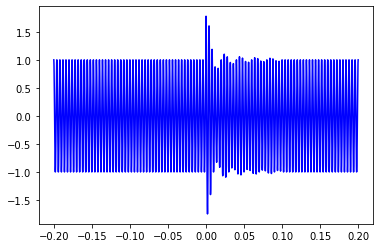

In [34]:
f_c = 250
c_t = np.cos(2 * np.pi * f_c * time)
u_t = c_t * m_t
alpha = 0.8

plt.plot(time, u_t, 'blue')
plt.show()

u_t_alpha = c_t * (1 + alpha * m_t)
plt.plot(time, u_t_alpha, 'blue')
plt.show()

<div dir="rtl">
بخش ب:


حال نمودار هارا رسم میکنیم:
</div>

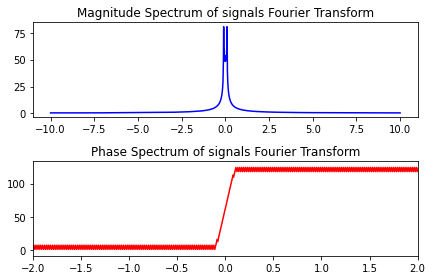

In [35]:
plot_magnitude_and_phase_for_signal(m_t, -2 ,2)

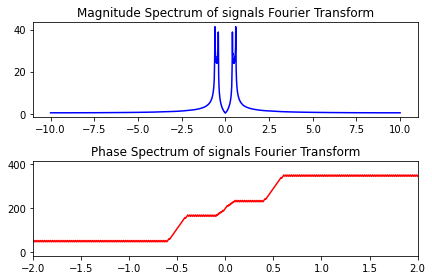

In [36]:
plot_magnitude_and_phase_for_signal(u_t, -2, 2)

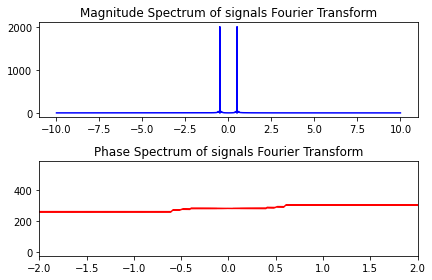

In [37]:
plot_magnitude_and_phase_for_signal(u_t_alpha, -2, 2)

<div dir="rtl">
بخش ج:

مقدار time_0 را به مقدار گفته شده افزایش میدهیم.
</div>

In [38]:
time_0 = 0.4
time = np.arange(-0.5, 0.5 + 0.0001, 0.0001);
begin_time = np.argmax(time > 0)
end_time = np.argmax(time > time_0)

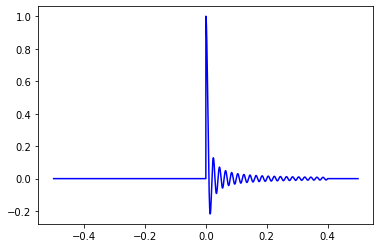

In [40]:
m_t = np.sinc(100 * time)
u_t = np.full(time.shape, 0)
u_t[begin_time:end_time] = 1
m_t = m_t * u_t

plt.plot(time, m_t, 'blue')
plt.show();

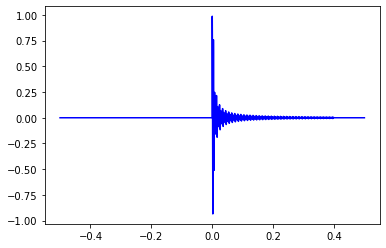

In [41]:
f_c = 250
c_t = np.cos(2 * np.pi * f_c * time)
u_t = c_t * m_t
alpha = 0.8

plt.plot(time, u_t, 'blue')
plt.show()

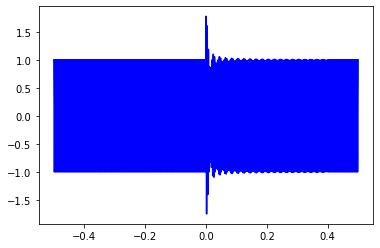

In [43]:
u_t_alpha = c_t * (1 + np.multiply(alpha, m_t))
plt.plot(time, u_t_alpha, 'blue')
plt.show()

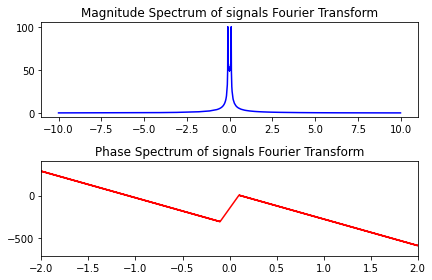

In [44]:
plot_magnitude_and_phase_for_signal(m_t, -2, 2)

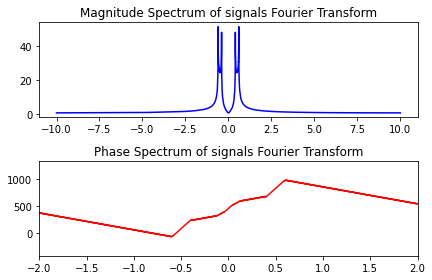

In [45]:
plot_magnitude_and_phase_for_signal(u_t, -2, 2)

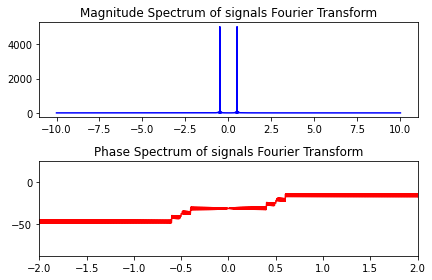

In [46]:
plot_magnitude_and_phase_for_signal(u_t_alpha, -2, 2)

<div dir="rtl">
نتیجه اولیه‌ای که میتوان گرفت این است که نمودار ها نرم تر شده اند و نمودار های فرکانس تغییرات را شدیدترنشان میدهند!
</div>